In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#### Here we have the data of seasson 13

Analysis of January

In [7]:
df = pd.read_csv("/home/alexhero/Downloads/League of Legends S13 -EDA/League of Legends Champion Stats 13.1.csv", sep=';')
df.head(15)

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
0,Aatrox,Fighter,TOP,S,57.63,-31.86,47.68%,91.63%,6.62%,11.98%,1.77
1,Ahri,Mage,MID,S,57.18,4.55,49.50%,94.65%,5.81%,1.73%,2.58
2,Akali,Assassin,MID,S,65.49,4.33,48.41%,75.74%,8.11%,13.02%,2.37
3,Akali,Assassin,TOP,C,39.63,-1.51,45.92%,23.50%,2.55%,13.02%,2.00
4,Akshan,Marksman,MID,A,49.39,0.34,51.62%,66.03%,2.75%,3.79%,2.26
5,Akshan,Marksman,TOP,B,44.58,2.61,51.69%,25.56%,1.01%,3.79%,2.00
6,Alistar,Tank,SUPPORT,B,43.21,-1.03,50.09%,95.95%,2.67%,0.60%,2.46
7,Amumu,Tank,JUNGLE,S,57.41,16.78,52.87%,49.07%,4.44%,5.20%,2.82
8,Amumu,Tank,SUPPORT,A,52.62,1.09,52.39%,50.05%,4.09%,5.20%,2.18
9,Anivia,Mage,MID,S,59.33,9.21,53.22%,86.04%,3.60%,3.56%,3.03


In [8]:
df.isnull().sum()

Name      0
Class     0
Role      0
Tier      0
Score     0
Trend     0
Win %     0
Role %    0
Pick %    0
Ban %     0
KDA       0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    244 non-null    object 
 1   Class   244 non-null    object 
 2   Role    244 non-null    object 
 3   Tier    244 non-null    object 
 4   Score   244 non-null    float64
 5   Trend   244 non-null    float64
 6   Win %   244 non-null    object 
 7   Role %  244 non-null    object 
 8   Pick %  244 non-null    object 
 9   Ban %   244 non-null    object 
 10  KDA     244 non-null    float64
dtypes: float64(3), object(8)
memory usage: 21.1+ KB


In [10]:
perc_cols = ['Win %', 'Role %', 'Pick %','Ban %']
df[perc_cols] = df[perc_cols].apply(lambda x: x.str[:-1].astype(float))
df.head(3)

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
0,Aatrox,Fighter,TOP,S,57.63,-31.86,47.68,91.63,6.62,11.98,1.77
1,Ahri,Mage,MID,S,57.18,4.55,49.50,94.65,5.81,1.73,2.58
2,Akali,Assassin,MID,S,65.49,4.33,48.41,75.74,8.11,13.02,2.37


<Axes: >

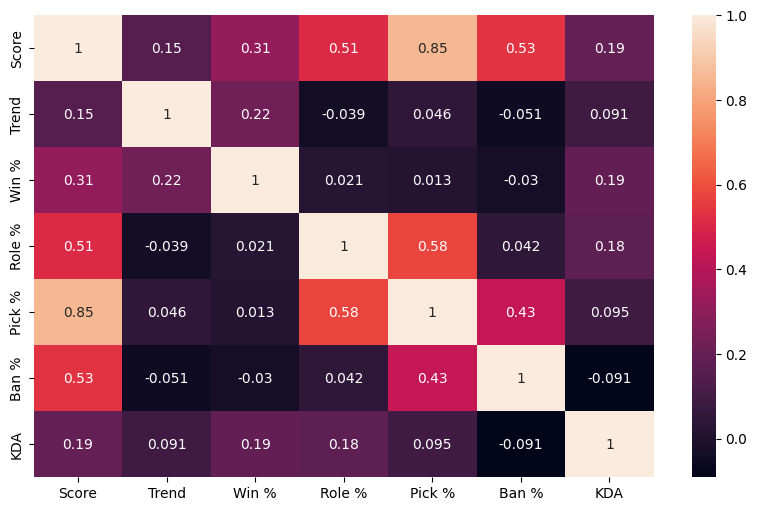

In [11]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True)

#### Best Champions for Jungle

In [12]:
jg= df[df['Role'].str.contains("JUNGLE")]
jg.head()

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
7,Amumu,Tank,JUNGLE,S,57.41,16.78,52.87,49.07,4.44,5.20,2.82
18,Bel'Veth,Fighter,JUNGLE,A,49.90,-3.44,50.94,94.30,3.89,8.20,2.39
31,Diana,Fighter,JUNGLE,S,59.94,-15.21,50.55,70.61,6.61,4.60,2.55
35,Ekko,Assassin,JUNGLE,S,65.07,-5.43,50.98,71.07,7.27,6.21,2.81
37,Elise,Mage,JUNGLE,God,69.88,16.71,52.37,96.95,6.93,11.73,2.90


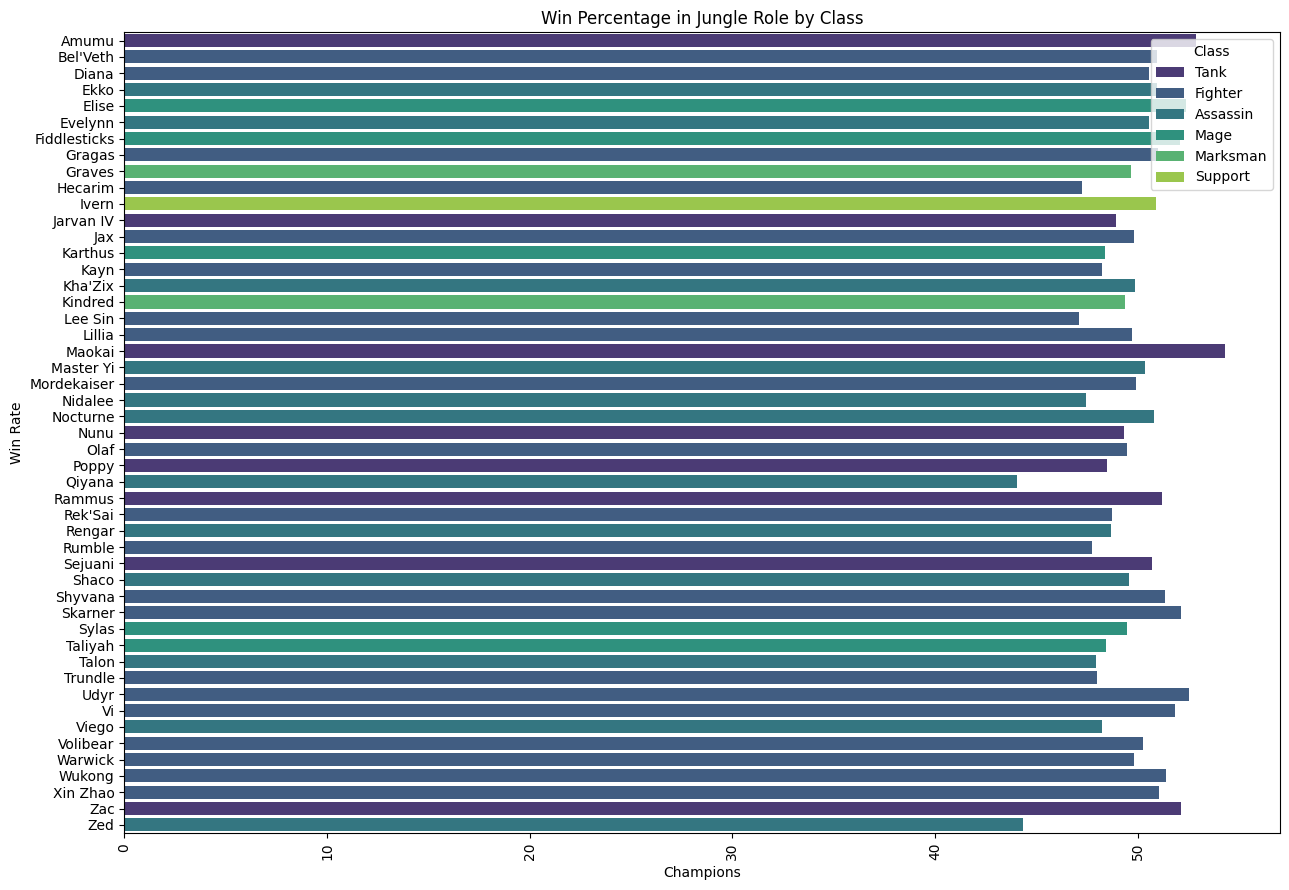

In [13]:
plt.figure(figsize=(13,9))
sns.barplot(y=jg['Name'], x=jg['Win %'], hue=jg['Class'], palette='viridis', orient='h')
plt.xlabel('Champions')
plt.ylabel('Win Rate')
plt.title("Win Percentage in Jungle Role by Class")
plt.xticks(rotation=90)
plt.legend(title='Class', loc='upper right')
plt.tight_layout()
plt.show()

#### Most picked of each class

In [14]:
df.head()

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
0,Aatrox,Fighter,TOP,S,57.63,-31.86,47.68,91.63,6.62,11.98,1.77
1,Ahri,Mage,MID,S,57.18,4.55,49.50,94.65,5.81,1.73,2.58
2,Akali,Assassin,MID,S,65.49,4.33,48.41,75.74,8.11,13.02,2.37
3,Akali,Assassin,TOP,C,39.63,-1.51,45.92,23.50,2.55,13.02,2.00
4,Akshan,Marksman,MID,A,49.39,0.34,51.62,66.03,2.75,3.79,2.26


In [15]:
best_tiers = (df.groupby('Tier').apply(lambda x: x.loc[x['Score'].agg(['idxmin','idxmax'])][['Score','Name','Role','Win %']]))
best_tiers = best_tiers.reset_index(level=1, drop=True).reset_index()
best_tiers

/tmp/ipykernel_78494/4110524269.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  best_tiers = (df.groupby('Tier').apply(lambda x: x.loc[x['Score'].agg(['idxmin','idxmax'])][['Score','Name','Role','Win %']]))


,Tier,Score,Name,Role,Win %
0,A,47.97,Zyra,SUPPORT,51.13
1,A,56.90,Ornn,TOP,51.31
2,B,41.86,Jarvan IV,JUNGLE,48.94
3,B,47.97,Jinx,ADC,50.67
4,C,36.06,Fiddlesticks,SUPPORT,51.43
5,C,41.51,Shyvana,TOP,51.45
6,D,21.30,Qiyana,JUNGLE,44.03
7,D,35.48,Poppy,JUNGLE,48.51
8,God,67.90,Yone,MID,50.42
9,God,97.26,Maokai,JUNGLE,54.31


In [16]:
px.bar(best_tiers, 'Name','Score', 'Tier', hover_data=['Role', 'Win %'], width=1000 , height=500)

In [17]:
# Distribuition of scores
px.histogram(df,'Score', color='Name', width=800 , height=600)

In [18]:
# Distribuition of win percentage
px.histogram(df,'Win %', color='Name', width=800 , height=600)

In [19]:
# Distrubuition of bans
px.histogram(df,'Ban %', color='Name', width=800 , height=600)

In [20]:
px.box(df, y='Win %', points='all', hover_data=['Name', 'Role'], width=600)

In [21]:
px.box(df, y='Pick %', points='all', hover_data=['Name', 'Role'], width=600)

In [22]:
px.box(df, y='Ban %', points='all', hover_data=['Name', 'Role'], width=600)

In [23]:
px.box(df, y='Role %', points='all', hover_data=['Name', 'Role'], width=600)

In [24]:
px.box(df, y='KDA', points='all', hover_data=['Name', 'Role'], width=600)

In [25]:
px.scatter(df, 'Pick %', 'Ban %', 'Name', 'Role', title='Champions Pick rate vs Ban rate', width=950, height=650)

In [26]:
#Classes with high win rate
winners = df.groupby(['Win %', 'Class', 'Name']).size().sort_index(ascending=True).reset_index()
px.bar(winners, 'Class', 'Win %', 'Name', width=750, height=600)

In [27]:
# Champions biggest scores
winners = df.groupby(['Score', 'Name', 'Role',]).size().sort_index(ascending=True).reset_index()
px.bar(winners, 'Name', 'Score', 'Role', width=1800, height=600)